<a href="https://colab.research.google.com/github/hossamEldeinMohmed/ITI/blob/master/NLP_Noise_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objective:
- The objective from this task is to use your NLP skills to build a ML model can <b>classify the news categories</b>.
- Try hard to get the maximum value of the preferable evaluation metric using any technique.
- <b>Concat headlines and short descriptions</b> and use them in classification. 

### Time:
- This task mustn't take more than <b>3 hours</b>.
    - Load Data and EDA : 30 minutes
    - Cleaning and Preprocessing : 60 Minutes
    - Modelling and Enhancement : 60 Minutes
    - Extratime : 30 minutes

### Fixed Rules:
- train test split 80% : 20%
- all random seeds = 42

# Delivery:
## Through this [form](https://forms.gle/PshJQw2bTa48Ligz7)

> ### Take a deep breath, read the instructions again, and then start

## Load Libraries

In [1]:
import pandas as pd
import numpy as np 

In [2]:
import spacy.cli
spacy.cli.download("en_core_web_md")
nlp = spacy.load("en_core_web_md")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [3]:
!python -m spacy download en_core_web_md

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.5 MB 451 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [76]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import spacy
from tqdm.auto import tqdm
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
nlp = spacy.load("en_core_web_md")

import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
import seaborn as sns

## Load Dataset

In [27]:
data = pd.read_json('/content/Dataset.json', lines=True)

## EDA

In [28]:
data.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [29]:
category = data.groupby('category')
print("total categories:", category.ngroups)
print(category.size())

total categories: 41
category
ARTS               1509
ARTS & CULTURE     1339
BLACK VOICES       4528
BUSINESS           5937
COLLEGE            1144
COMEDY             5175
CRIME              3405
CULTURE & ARTS     1030
DIVORCE            3426
EDUCATION          1004
ENTERTAINMENT     16058
ENVIRONMENT        1323
FIFTY              1401
FOOD & DRINK       6226
GOOD NEWS          1398
GREEN              2622
HEALTHY LIVING     6694
HOME & LIVING      4195
IMPACT             3459
LATINO VOICES      1129
MEDIA              2815
MONEY              1707
PARENTING          8677
PARENTS            3955
POLITICS          32739
QUEER VOICES       6314
RELIGION           2556
SCIENCE            2178
SPORTS             4884
STYLE              2254
STYLE & BEAUTY     9649
TASTE              2096
TECH               2082
THE WORLDPOST      3664
TRAVEL             9887
WEDDINGS           3651
WEIRD NEWS         2670
WELLNESS          17827
WOMEN              3490
WORLD NEWS         2177
WORLDPOST 

In [30]:
data.isnull().sum()

category             0
headline             0
authors              0
link                 0
short_description    0
date                 0
dtype: int64

## Cleaning & Preprocessing

In [31]:
data=data.drop(["date","link"],axis=1)

In [32]:
data.duplicated().values.any()


True

In [33]:
data.drop_duplicates()

,category,headline,authors,short_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,She left her husband. He killed their children...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,The actor gives Dems an ass-kicking for not fi...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,"The ""Dietland"" actress said using the bags is ..."
...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",Verizon Wireless and AT&T are already promotin...
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,"Afterward, Azarenka, more effusive with the pr..."
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,"Leading up to Super Bowl XLVI, the most talked..."
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,CORRECTION: An earlier version of this story i...


In [55]:
mapping = dict(enumerate(data['category'].unique()))
LABEL_MAPPING = {value: key for key, value in mapping.items()}
LABEL_MAPPING

{'ARTS': 29,
 'ARTS & CULTURE': 21,
 'BLACK VOICES': 6,
 'BUSINESS': 11,
 'COLLEGE': 19,
 'COMEDY': 8,
 'CRIME': 0,
 'CULTURE & ARTS': 39,
 'DIVORCE': 34,
 'EDUCATION': 18,
 'ENTERTAINMENT': 1,
 'ENVIRONMENT': 38,
 'FIFTY': 28,
 'FOOD & DRINK': 36,
 'GOOD NEWS': 27,
 'GREEN': 23,
 'HEALTHY LIVING': 25,
 'HOME & LIVING': 32,
 'IMPACT': 3,
 'LATINO VOICES': 17,
 'MEDIA': 13,
 'MONEY': 37,
 'PARENTING': 31,
 'PARENTS': 20,
 'POLITICS': 4,
 'QUEER VOICES': 9,
 'RELIGION': 15,
 'SCIENCE': 16,
 'SPORTS': 10,
 'STYLE': 22,
 'STYLE & BEAUTY': 33,
 'TASTE': 24,
 'TECH': 14,
 'TRAVEL': 12,
 'WEDDINGS': 35,
 'WEIRD NEWS': 5,
 'WELLNESS': 30,
 'WOMEN': 7,
 'WORLD NEWS': 2,
 'WORLDPOST': 26}

In [34]:
data["text"]= data["headline"] + " " + data["short_description"]+ " "+data["authors"]
data.head()

,category,headline,authors,short_description,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...


In [35]:
data=data.drop(["headline","short_description","authors"],axis=1)

In [36]:
def to_lowercase(text):
    return text.lower()

In [37]:
data['text']=data['text'].apply(lambda x: to_lowercase(x))

In [38]:
data.head()

,category,text
0,CRIME,there were 2 mass shootings in texas last week...
1,ENTERTAINMENT,will smith joins diplo and nicky jam for the 2...
2,ENTERTAINMENT,hugh grant marries for the first time at age 5...
3,ENTERTAINMENT,jim carrey blasts 'castrato' adam schiff and d...
4,ENTERTAINMENT,julianna margulies uses donald trump poop bags...


In [39]:
def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [40]:
data['text']=data['text'].apply(lambda x: remove_punctuation(x))

In [41]:
data.head()

,category,text
0,CRIME,there were 2 mass shootings in texas last week...
1,ENTERTAINMENT,will smith joins diplo and nicky jam for the 2...
2,ENTERTAINMENT,hugh grant marries for the first time at age 5...
3,ENTERTAINMENT,jim carrey blasts castrato adam schiff and dem...
4,ENTERTAINMENT,julianna margulies uses donald trump poop bags...


In [51]:
data.category = data.category.map(lambda x: "WORLDPOST" if x == "THE WORLDPOST" else x)

In [42]:
def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)

In [43]:
import re
data['text']=data['text'].apply(lambda x: replace_numbers(x))
data.head(20)

,category,text
0,CRIME,there were mass shootings in texas last week ...
1,ENTERTAINMENT,will smith joins diplo and nicky jam for the ...
2,ENTERTAINMENT,hugh grant marries for the first time at age ...
3,ENTERTAINMENT,jim carrey blasts castrato adam schiff and dem...
4,ENTERTAINMENT,julianna margulies uses donald trump poop bags...
5,ENTERTAINMENT,morgan freeman devastated that sexual harassme...
6,ENTERTAINMENT,donald trump is lovin new mcdonalds jingle in ...
7,ENTERTAINMENT,what to watch on amazon prime that’s new this ...
8,ENTERTAINMENT,mike myers reveals hed like to do a fourth aus...
9,ENTERTAINMENT,what to watch on hulu that’s new this week you...


In [52]:
def get_sequences(texts, tokenizer, train=True, max_seq_length=0):
    sequences = tokenizer.texts_to_sequences(texts)
    
    if train == True:
        max_seq_length = np.max(list(map(lambda x: len(x), sequences)))
    
    sequences = pad_sequences(sequences, maxlen=max_seq_length, padding='post')
    
    return sequences

In [59]:
from sklearn.model_selection import train_test_split
def preprocess_inputs(data, label_mapping=None):
    data = data.copy()
    
    # Use only the headline and category columns
    data = data.loc[:, ['text', 'category']]
    
    # Sample 1000 examples from each category
    category_samples = []
    
    for category in data['category'].unique():
        category_slice = data.query("category == @category")
        category_samples.append(category_slice.sample(1000, random_state=1))
    data = pd.concat(category_samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
    
    # Map the labels to integers
    data['category'] = data['category'].replace(label_mapping)
    
    # Split df into X and y
    y = data['category']
    X = data['text']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Fit a tokenizer
    tokenizer = Tokenizer(num_words=10000)
    tokenizer.fit_on_texts(X_train)
    
    # Get sequence data
    X_train = get_sequences(X_train, tokenizer, train=True)
    X_test = get_sequences(X_test, tokenizer, train=False, max_seq_length=X_train.shape[1])
    
    return X_train, X_test, y_train, y_test

In [60]:
X_train, X_test, y_train, y_test = preprocess_inputs(data, label_mapping=LABEL_MAPPING)

In [44]:
from tensorflow.keras.preprocessing.text import Tokenizer 

In [61]:
X_train.shape

(28000, 172)

In [62]:
X_train

array([[  59,  185, 1923, ...,    0,    0,    0],
       [  65, 1124, 1243, ...,    0,    0,    0],
       [3354, 2788, 3199, ...,    0,    0,    0],
       ...,
       [4551,   23,  745, ...,    0,    0,    0],
       [1402, 1057,  183, ...,    0,    0,    0],
       [   1, 2087,   46, ...,    0,    0,    0]], dtype=int32)

In [64]:
import tensorflow as tf

## Modelling

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 172)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 172, 64)           640000    
                                                                 
 flatten_1 (Flatten)         (None, 11008)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1409152   
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 40)                5160      
                                                                 
Total params: 2,070,824
Trainable params: 2,070,824
Non-train

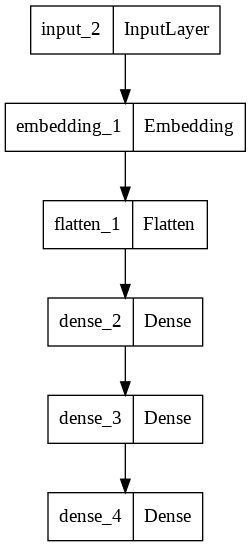

In [66]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

embedding = tf.keras.layers.Embedding(
    input_dim=10000,
    output_dim=64
)(inputs)

flatten = tf.keras.layers.Flatten()(embedding)

dense_1 = tf.keras.layers.Dense(128, activation='relu')(flatten)
dense_2 = tf.keras.layers.Dense(128, activation='relu')(dense_1)

outputs = tf.keras.layers.Dense(40, activation='softmax')(dense_2)


model = tf.keras.Model(inputs, outputs)

print(model.summary())
tf.keras.utils.plot_model(model)

In [69]:
history=model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
700/700 [==============================] - 18s 25ms/step - loss: 1.0493 - accuracy: 0.7013 - val_loss: 2.2350 - val_accuracy: 0.4582
Epoch 2/100
700/700 [==============================] - 18s 26ms/step - loss: 0.4160 - accuracy: 0.8903 - val_loss: 2.7758 - val_accuracy: 0.4487
Epoch 3/100
700/700 [==============================] - 20s 28ms/step - loss: 0.1069 - accuracy: 0.9793 - val_loss: 3.4901 - val_accuracy: 0.4414
Epoch 4/100
700/700 [==============================] - 19s 27ms/step - loss: 0.0259 - accuracy: 0.9966 - val_loss: 3.9782 - val_accuracy: 0.4470


In [77]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})

In [70]:
print("Test Accuracy: {:.2f}%".format(model.evaluate(X_test, y_test, verbose=0)[1] * 100))

Test Accuracy: 46.24%


In [71]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

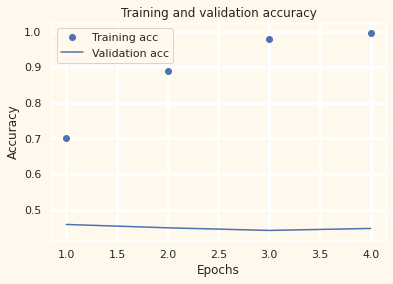

In [78]:

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(linewidth = 3)

plt.show()

## Enhancement

In [81]:
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, GRU
from keras.layers import Embedding
from keras.layers import LSTM

In [92]:
X,Y =data['text'],data['category']

#80% to train , 10% for validation , 10% for testing
X_train, X_val, y_train, y_val = train_test_split(X,Y, test_size=0.2, random_state=42)
X_val, X_test , y_val, y_test= train_test_split(X_val,y_val, test_size=0.5, random_state=42)

In [93]:
vocab_size =20000
max_length = 150
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [94]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train,maxlen= max_length,padding=padding_type, truncating=trunc_type)
y_train = np.asarray(y_train)
y_train = pd.get_dummies(y_train)

X_val = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(X_val,maxlen= max_length,padding=padding_type, truncating=trunc_type)
y_val = np.asarray(y_val)
y_val = pd.get_dummies(y_val)

train_set = np.array(X_train)
val_set = np.array(X_val)

train_label = np.array(y_train)
val_label = np.array(y_val)


y_test = pd.get_dummies(y_test)
y_test = np.asarray(y_test)
y_test = np.argmax(y_test,axis=1)   #this would be our ground truth label while testing

print(train_set.shape)
print(train_label.shape)


print(val_set.shape)
print(val_label.shape)


(160507, 150)
(160507, 40)
(20063, 150)
(20063, 40)


In [104]:
print(train_set)

[[ 1627  2689  1200 ...     0     0     0]
 [ 1123   114     3 ...     0     0     0]
 [  127  2336  3852 ...     0     0     0]
 ...
 [  190     3   888 ...     0     0     0]
 [    1 15936   553 ...     0     0     0]
 [ 7268  5235   533 ...     0     0     0]]


In [107]:
embedding_size = 50
model = Sequential()
model.add(Embedding(vocab_size,embedding_size, mask_zero=True, input_length=max_length))
model.add(LSTM(50))
model.add(Dense(40, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 150, 50)           1000000   
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_10 (Dense)            (None, 40)                2040      
                                                                 
Total params: 1,022,240
Trainable params: 1,022,240
Non-trainable params: 0
_________________________________________________________________


In [108]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [110]:
batch_size = 256
epochs = 3

history = model.fit(train_set,train_label,
          batch_size = batch_size,
          epochs = epochs,          
          validation_data = (val_set , val_label))

Epoch 1/3
627/627 [==============================] - 247s 394ms/step - loss: 1.1113 - accuracy: 0.7058 - val_loss: 1.1470 - val_accuracy: 0.6964
Epoch 2/3
627/627 [==============================] - 227s 362ms/step - loss: 0.8818 - accuracy: 0.7628 - val_loss: 1.0610 - val_accuracy: 0.7153
Epoch 3/3
627/627 [==============================] - 229s 366ms/step - loss: 0.7376 - accuracy: 0.7989 - val_loss: 1.0470 - val_accuracy: 0.7236


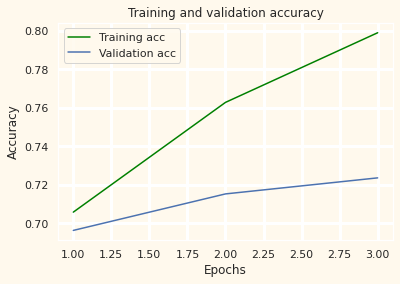

In [113]:
history_dict = history.history
history_dict.keys()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b',color='green', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(linewidth = 3)

plt.show()

## Final Results and Conclusion

In [25]:
#LSTM is best from normal NN 
# i run LSTM Just on 3 epochs

## Best Wishes


## Again: Delivery through this [form](https://forms.gle/PshJQw2bTa48Ligz7)